In SPH (Smoothed particles hydrodynamics), a property $A$ of a weakly compressible fluid at $r$ can be simulated by particles as

$$
A_S(r)=\sum_j m_j\frac{A_j}{\rho_j}W(r-r_j,h)
$$

where the kernel functions $W(r,h)$ is normalized, $\int W(r)dr=1$

it follows that
$$
\rho_s(r)=\sum_j m_j W(r-r_j,h)\\
\nabla A_S(r)=\sum_j m_j\frac{A_j}{\rho_j}\nabla W(r-r_j,h)\\
\nabla^2 A_S(r)=\sum_j m_j\frac{A_j}{\rho_j}\nabla^2 W(r-r_j,h)
$$

where $h$ is the support radius. $W=0$ outside this radius.

(the operator acts on $r$, although $m_j,\rho_j, A_j$ dependes on $r$, their derivatives ($\neq0$ in general) are ignored)

(it's a good approximation if $r+\delta$ stays inside/outside the support radius of particle $j$ as before, at $r$, a better explanation at the end)

The Navier-Stokes equation (for incompressible flow) is

$$
\rho\frac{D u}{D t}=\rho g-\nabla p+\eta\nabla^2 u
$$

where the first term is the acceleration of the particles times $\rho$, define it to be the force density $f$.

$$f=f_g+f_p+f_v$$

$f_g$ is easy as $g$ is a constant (vector)

$$
f_p=-\nabla p(r) = -\sum_j m_j\frac{p_j}{\rho_j}\nabla W(r-r_j,h)
$$

$$
f_v=\eta\sum_j m_j\frac{v_j}{\rho_j}\nabla^2 W(r-r_j,h)
$$

By ideal gas law, $p=k\rho$ (so it's not really incompressible),
we use $\boxed{p=k(\rho-\rho_0)}$ in simulation, where $\rho_0$ is the rest density.

$W(r,h)=W_{poly6}(r,h)=\begin{cases}
\frac{315}{64\pi h^9}(h^2-r^2)^3,\quad 0\leq r\leq h\\
0,\quad\text{otherwise}
\end{cases}$

then $\int_0^a f(x)(4\pi x^2)d x = 1$

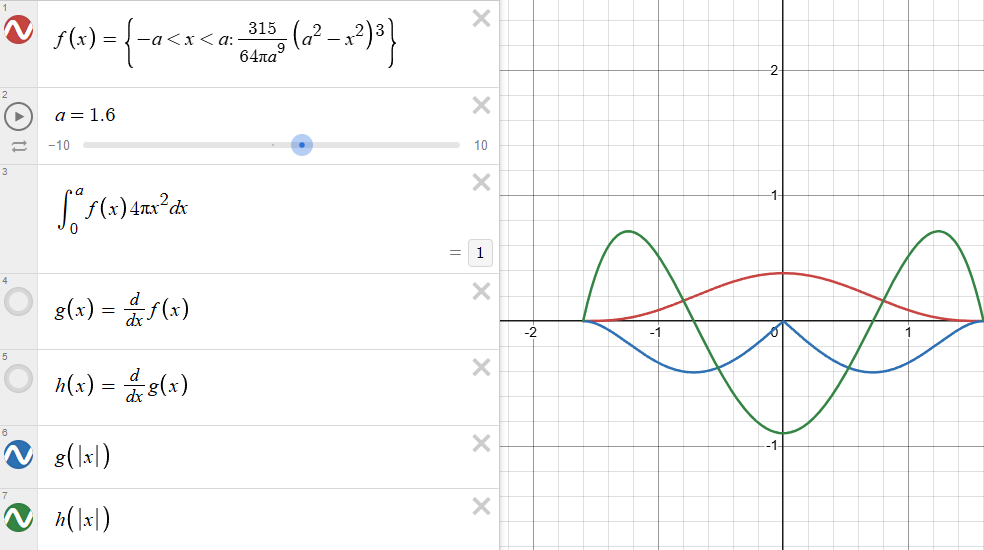

In 2D:

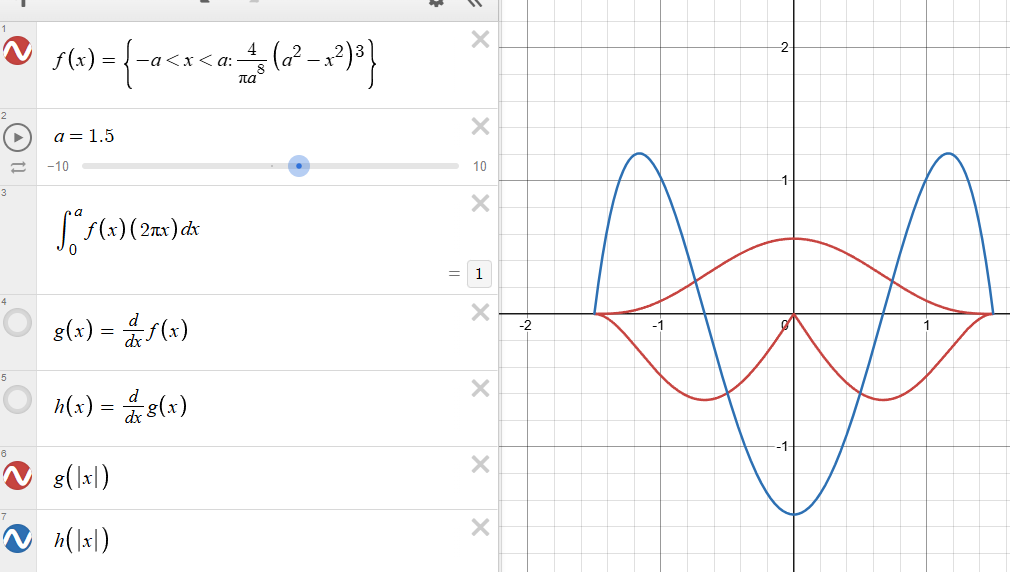

But everything will fail tragically if we consider two particles with different pressure and velocity.

$\nabla W(0,h) = 0$ by definition. If $p_i\neq p_j$, two different values of $f_p$ will be found in the at the two particles, which violates one of Newton's law.

This happens because we sample $A_S$ with SPH, we're doing approximations from the start (should be $A_S\approx$ instead of $A_S=\ldots$). Naturally, both values are equivalent and the average is used.

$$
f_{p,i}=-\nabla p(r) = -\sum_j m_j\frac{p_i+p_j}{2\rho_j}\nabla W(r_i-r_j,h)
$$

another symmetric form is 

$$
f_{p,i} = \rho\sum_j m_j\left(\frac{f(r_j)}{\rho_j^2}+\frac{f(r_i)}{\rho_i^2}\right)\nabla W(r_i-r_j, h)
$$

We also have $f_{v,i}$ being antisymmetric. Intuitively, it's because the viscous term depends on relative velocity.

$$
f_{v,i}=\eta\sum_j m_j\frac{v_j-v_i}{\rho_j}\nabla^2 W(r_i-r_j,h)
$$

Practically, this is why this form is better:

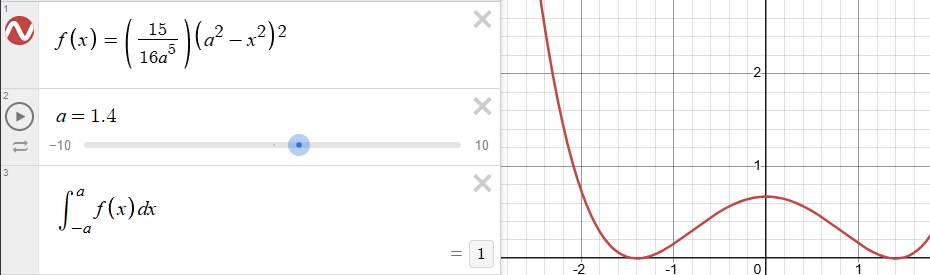


1D example:

10 particles on a range of [-5,5] will average to a value of 1

in this case $A_S(r) = 1 = \sum_j W(r-r_j,h)$  

($m_j,\rho_j = 1$)

(change the support radius a to see how the kernels approximate 1)

Text(0, 0.5, '$A_S$')

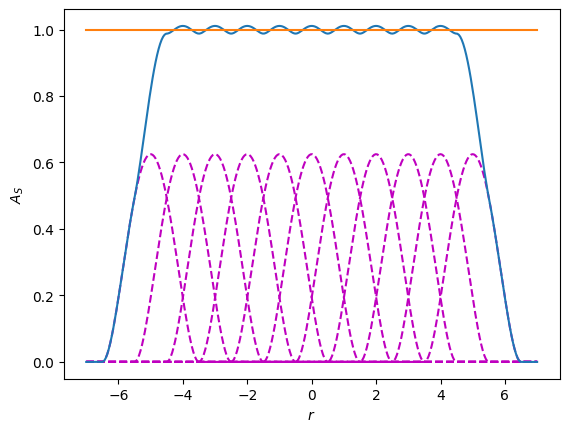

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as smp

x = smp.symbols("x")
a = 1.5 # a random pick
f = (a*a-x*x)**2*15/16/a**5
df = f.diff(x)

def f1(c):
    ans = np.zeros(len(c))
    for i in range(len(c)):
        if -a<c[i]<a:
            ans[i] = f.subs(x,c[i])
        else:
            ans[i] = 0.
    return ans

b = np.linspace(-7,7,300)
total_f = np.zeros(len(b))
for i in range(-5,6):
    temp = f1(b-i)
    total_f += temp
    plt.plot(b,temp,'m--')
plt.plot(b,total_f)
plt.plot(b,np.ones(len(b)))
plt.xlabel("$r$")
plt.ylabel("$A_S$")

gradient of 1 is 0. How can this be approximated?

Text(0, 0.5, "$A_S'$")

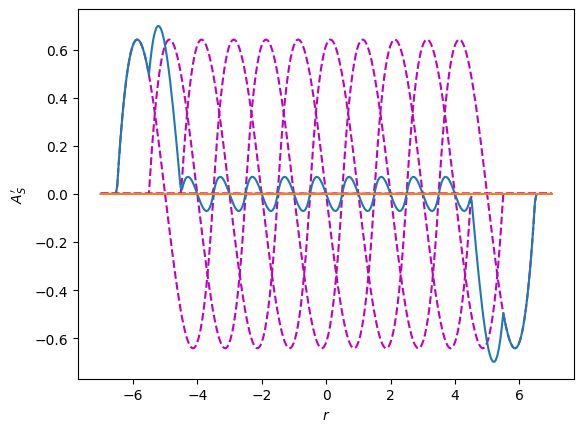

In [61]:
def df1(c):
    ans = np.zeros(len(c))
    for i in range(len(c)):
        if -a<c[i]<a:
            ans[i] = df.subs(x,c[i])
        else:
            ans[i] = 0.
    return ans

b = np.linspace(-7,7,300)
total_f = np.zeros(len(b))
for i in range(-5,6):
    temp = df1(b-i)
    total_f += temp
    plt.plot(b,temp,'m--')
plt.plot(b,total_f)
plt.plot(b,np.zeros(len(b)))
plt.xlabel("$r$")
plt.ylabel("$A_S'$")

This is what you get by using the gradient directly.

Now try the antisymmetric form $A_S(r_i)=\eta\sum_j m_j\frac{A_j-A_i}{\rho_j}\nabla^2 W(r_i-r_j,h) = 0$, because ($A_i=1$ for all particles)

Text(0, 0.5, "$A_S'$")

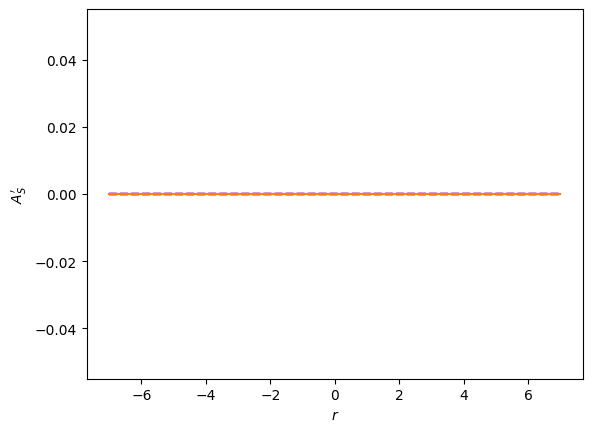

In [62]:
b = np.linspace(-7,7,300)
total_f = np.zeros(len(b))
for i in range(-5,6):
    temp = (1-1)*df1(b-i)
    total_f += temp
    plt.plot(b,temp,'m--')
plt.plot(b,total_f)
plt.plot(b,np.zeros(len(b)))
plt.xlabel("$r$")
plt.ylabel("$A_S'$")

Conclusion:

- pressure force density is in \textbf{symmetric form} because of action and reaction are equal
- viscous force density is antisymmetric because of momentum conservation + identical particles thus velocity conservation, thus $\nabla^2 u=\nabla\cdot 0 =0$ (for nearby particles only)

By considering simple cases we justified why these forms are better choices.

In practice, we can always try both and choose the one that looks better to decide which to use for complicated cases.

Next we see how they are equivalent to the original defintion mathematically:

$$
\nabla A_S(r_i)=\nabla A_S(r_i) - A_S(r_i)\times\nabla 1\\
\nabla A_S(r_i)=\sum_j m_j\frac{A_{S,j}}{\rho_j}\nabla W(r_i-r_j,h) - A_{S,i}\sum_j m_j\frac{1}{\rho_j}\nabla W(r_i-r_j,h)\\
\nabla A_S(r_i)=\sum_j m_j\frac{A_{S,j}-A_{S,i}}{\rho_j}\nabla W(r_i-r_j,h)
$$

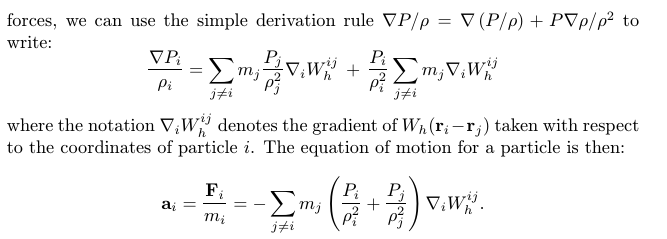

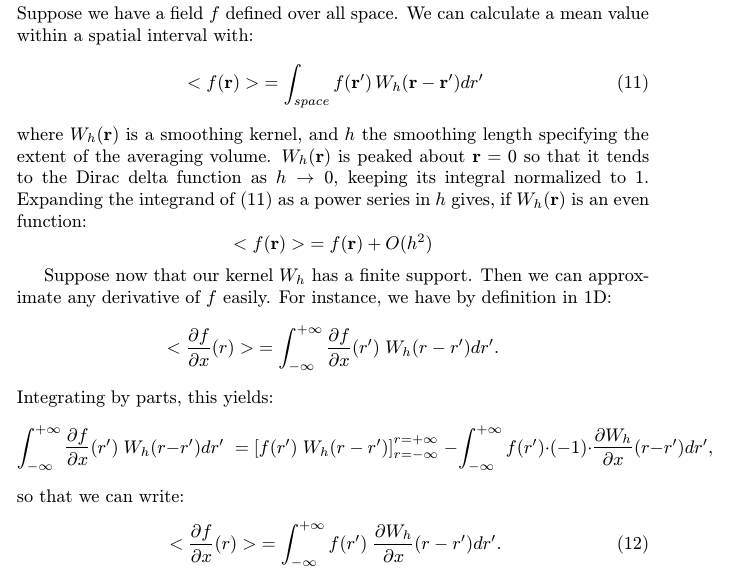

#### other kernels

- spiky: non vanishing gradient at the center, prevent overlapping particles under high pressure

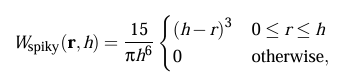

- viscosity: to prevent negative $\nabla^2 v$

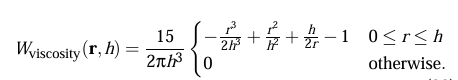
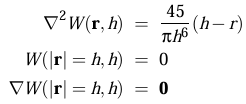

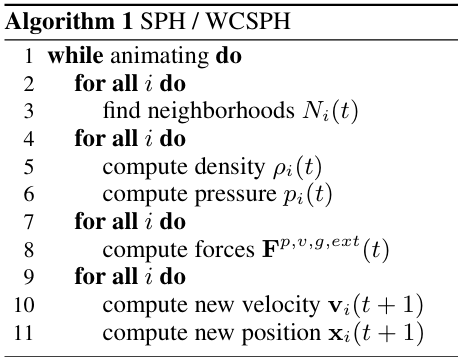